### <span style="color:black"><b>Pandas Tutorial 8</b></span>

---

<u>Sorting & Counting Values</u>

* Perhaps we want to see what the biggest sale was for a particular month, or if there are extreme outliers in a particular series
* Maybe we want to see which customer placed the most orders with our company 
* All of these tasks can be done through the `sort_values()` and `value_counts()` dataframe and series methods
* Useful resources below:

* <u>[Sort Values](https://towardsdatascience.com/a-hands-on-guide-to-sorting-dataframes-in-pandas-384996ca6bb8)</u>
* <u>[Count Values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)</u>


In [1]:
import pandas as pd

In [2]:
# Read in the tsv file. Not csv this time
df = pd.read_table('golf.tsv', sep='\t')

In [3]:
# First few rows
df.head(3)

,First,Last_name,Player,AGE,EVENTS_PLAYED,AVG_CARRY_DISTANCE,STEEPEST_LAUNCH_ANGLE,FAIRWAYS_HIT,TOTAL_DRIVES
0,Chris,Stroud,Chris Stroud,32,27,271.9,14.76,638,816
1,Daniel,Berger,Daniel Berger,25,23,277.1,17.23,649,816
2,Kelly,Kraft,Kelly Kraft,26,31,267.3,16.19,846,"1,032"


In [4]:
# Descriptive stats
df.describe()

,AGE,EVENTS_PLAYED,AVG_CARRY_DISTANCE,STEEPEST_LAUNCH_ANGLE
count,194.000000,194.000000,194.000000,194.000000
mean,32.932990,24.175258,278.077320,14.880155
std,5.646829,4.162528,10.027207,1.632605
min,21.000000,15.000000,249.800000,10.700000
25%,29.000000,21.000000,270.900000,13.720000
50%,33.000000,24.500000,278.200000,14.835000
75%,36.000000,27.000000,283.700000,16.015000
max,49.000000,32.000000,302.600000,18.620000


In [5]:
# Column names, dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   First                  194 non-null    object 
 1   Last_name              194 non-null    object 
 2   Player                 194 non-null    object 
 3   AGE                    194 non-null    int64  
 4   EVENTS_PLAYED          194 non-null    int64  
 5   AVG_CARRY_DISTANCE     194 non-null    float64
 6   STEEPEST_LAUNCH_ANGLE  194 non-null    float64
 7   FAIRWAYS_HIT           194 non-null    object 
 8   TOTAL_DRIVES           194 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 13.8+ KB


In [6]:
# Duplicated
df.loc[df.duplicated(), :]

,First,Last_name,Player,AGE,EVENTS_PLAYED,AVG_CARRY_DISTANCE,STEEPEST_LAUNCH_ANGLE,FAIRWAYS_HIT,TOTAL_DRIVES


**Exercise: Find the oldest player and get their age (at the time this dataset was created)**

In [7]:
df.sort_values(by='AGE', ascending=False)

,First,Last_name,Player,AGE,EVENTS_PLAYED,AVG_CARRY_DISTANCE,STEEPEST_LAUNCH_ANGLE,FAIRWAYS_HIT,TOTAL_DRIVES
142,Retief,Goosen,Retief Goosen,49,20,281.6,15.51,402,558
91,Jim,Furyk,Jim Furyk,48,15,249.8,14.59,427,584
150,Rod,Pampling,Rod Pampling,48,20,259.0,14.79,514,626
140,Phil,Mickelson,Phil Mickelson,48,22,293.8,12.69,551,868
132,Padraig,Harrington,Padraig Harrington,47,16,278.2,13.76,293,860
...,...,...,...,...,...,...,...,...,...
190,Xander,Schauffele,Xander Schauffele,24,25,289.7,10.70,677,900
21,Beau,Hossler,Beau Hossler,23,27,283.0,17.42,842,"1,258"
95,Jon,Rahm,Jon Rahm,23,18,298.3,16.45,466,634
11,Aaron,Wise,Aaron Wise,22,27,282.5,17.49,688,"1,032"


**Which 25 golfers hit the longest drives on average**

In [8]:
# the 'by' argument can always be passed in as a list if you want
df.sort_values(by=['AVG_CARRY_DISTANCE'], ascending=False).head(25)

,First,Last_name,Player,AGE,EVENTS_PLAYED,AVG_CARRY_DISTANCE,STEEPEST_LAUNCH_ANGLE,FAIRWAYS_HIT,TOTAL_DRIVES
177,Tom,Lovelady,Tom Lovelady,41,28,302.6,14.38,619,964
151,Rory,McIlroy,Rory McIlroy,29,16,302.5,14.80,396,628
115,Luke,List,Luke List,29,28,301.1,16.61,674,"1,060"
180,Trey,Mullinax,Trey Mullinax,27,24,300.4,13.58,513,794
65,Dustin,Johnson,Dustin Johnson,34,18,299.7,15.88,506,760
95,Jon,Rahm,Jon Rahm,23,18,298.3,16.45,466,634
40,Brooks,Koepka,Brooks Koepka,28,15,297.0,18.02,405,648
179,Tony,Finau,Tony Finau,28,26,296.9,12.77,650,"1,020"
103,Keith,Mitchell,Keith Mitchell,34,28,295.7,13.72,757,"1,162"
72,Grayson,Murray,Grayson Murray,24,22,295.2,16.12,565,828


**Exercise: Who has hit the most fairways so far?**

In [9]:
df.sort_values(by=['FAIRWAYS_HIT'], ascending=False)

,First,Last_name,Player,AGE,EVENTS_PLAYED,AVG_CARRY_DISTANCE,STEEPEST_LAUNCH_ANGLE,FAIRWAYS_HIT,TOTAL_DRIVES
20,Austin,Cook,Austin Cook,27,28,273.7,17.25,958,"1,288"
37,Brian,Stuard,Brian Stuard,35,32,260.1,17.16,945,"1,202"
35,Brian,Gay,Brian Gay,46,29,261.5,15.50,914,"1,230"
54,Chris,Kirk,Chris Kirk,34,28,270.7,16.94,911,"1,340"
44,C.T.,Pan,C.T. Pan,26,29,276.6,15.51,901,"1,146"
...,...,...,...,...,...,...,...,...,...
59,Daniel,Summerhays,Daniel Summerhays,34,19,260.6,15.35,344,532
26,Andrew,Yun,Andrew Yun,27,22,267.8,16.54,337,476
132,Padraig,Harrington,Padraig Harrington,47,16,278.2,13.76,293,860
168,Smylie,Kaufman,Smylie Kaufman,25,22,286.8,14.03,268,544


In [10]:
# Delete the commas
df['FAIRWAYS_HIT'] = df['FAIRWAYS_HIT'].str.replace(',', '')

# Convert to integers
df['FAIRWAYS_HIT'] = df['FAIRWAYS_HIT'].astype(int)

In [11]:
# Now we can use sort_values()
df.sort_values(by=['FAIRWAYS_HIT'], ascending=False)

,First,Last_name,Player,AGE,EVENTS_PLAYED,AVG_CARRY_DISTANCE,STEEPEST_LAUNCH_ANGLE,FAIRWAYS_HIT,TOTAL_DRIVES
155,Ryan,Armour,Ryan Armour,36,31,257.5,12.86,1060,"1,344"
20,Austin,Cook,Austin Cook,27,28,273.7,17.25,958,"1,288"
37,Brian,Stuard,Brian Stuard,35,32,260.1,17.16,945,"1,202"
35,Brian,Gay,Brian Gay,46,29,261.5,15.50,914,"1,230"
54,Chris,Kirk,Chris Kirk,34,28,270.7,16.94,911,"1,340"
...,...,...,...,...,...,...,...,...,...
8,Zecheng,Dou,Zecheng Dou,21,23,273.9,14.89,374,502
59,Daniel,Summerhays,Daniel Summerhays,34,19,260.6,15.35,344,532
26,Andrew,Yun,Andrew Yun,27,22,267.8,16.54,337,476
132,Padraig,Harrington,Padraig Harrington,47,16,278.2,13.76,293,860


**Thought: Perhaps a fairways hit per event metric might be a better thing to base it off. Let's do that**

In [12]:
# Create the column
df['fairways/event'] = df.FAIRWAYS_HIT / df.EVENTS_PLAYED

# Sort values by this new column
df.sort_values(by = ['fairways/event'])

,First,Last_name,Player,AGE,EVENTS_PLAYED,AVG_CARRY_DISTANCE,STEEPEST_LAUNCH_ANGLE,FAIRWAYS_HIT,TOTAL_DRIVES,fairways/event
168,Smylie,Kaufman,Smylie Kaufman,25,22,286.8,14.03,268,544,12.181818
26,Andrew,Yun,Andrew Yun,27,22,267.8,16.54,337,476,15.318182
109,Kiradech,Aphibarnrat,Kiradech Aphibarnrat,34,24,275.0,14.68,375,420,15.625000
8,Zecheng,Dou,Zecheng Dou,21,23,273.9,14.89,374,502,16.260870
47,Cameron,Tringale,Cameron Tringale,33,26,278.3,14.92,458,714,17.615385
...,...,...,...,...,...,...,...,...,...,...
76,Henrik,Stenson,Henrik Stenson,42,15,281.6,14.86,501,558,33.400000
155,Ryan,Armour,Ryan Armour,36,31,257.5,12.86,1060,"1,344",34.193548
20,Austin,Cook,Austin Cook,27,28,273.7,17.25,958,"1,288",34.214286
66,Emiliano,Grillo,Emiliano Grillo,25,24,276.8,15.12,842,994,35.083333


## <span style="color:black"><u>Sorting values by more than one series</u></span>

**Exercise: Sort values by age. If there is a tie in age, then base it off events played**

In [13]:
df.sort_values(by=['AGE', 'EVENTS_PLAYED'], ascending=False, ignore_index=True)

,First,Last_name,Player,AGE,EVENTS_PLAYED,AVG_CARRY_DISTANCE,STEEPEST_LAUNCH_ANGLE,FAIRWAYS_HIT,TOTAL_DRIVES,fairways/event
0,Retief,Goosen,Retief Goosen,49,20,281.6,15.51,402,558,20.100000
1,Phil,Mickelson,Phil Mickelson,48,22,293.8,12.69,551,868,25.045455
2,Rod,Pampling,Rod Pampling,48,20,259.0,14.79,514,626,25.700000
3,Jim,Furyk,Jim Furyk,48,15,249.8,14.59,427,584,28.466667
4,Alex,Cejka,Alex Cejka,47,24,265.8,18.47,639,836,26.625000
...,...,...,...,...,...,...,...,...,...,...
189,Grayson,Murray,Grayson Murray,24,22,295.2,16.12,565,828,25.681818
190,Beau,Hossler,Beau Hossler,23,27,283.0,17.42,842,"1,258",31.185185
191,Jon,Rahm,Jon Rahm,23,18,298.3,16.45,466,634,25.888889
192,Aaron,Wise,Aaron Wise,22,27,282.5,17.49,688,"1,032",25.481481


**Exercise: Sort values by age in descending order, but if there is a tie, then sort events played in ascending order**
* Update the order so that it stays this way

In [14]:
df.sort_values(by=['AGE', 'EVENTS_PLAYED'], ascending=[False, True], inplace=True)

## <span style="color:black"><u>Value Counts</u></span>

* `df.sort_values(by = 'col_1')` works nicely on a series or a dataframe but `value_counts()` is best used as just a series method
* So we take a column and count how many times the value showed up
* For continous data we can always set up bins if we want too

In [15]:
sales = pd.read_csv('500000 Sales Records.csv')
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18


**Exercise: What was the most commonly occuring country in our dataset**

In [16]:
sales['Country'].value_counts()

Cape Verde        2840
Guinea            2805
Liberia           2805
Singapore         2804
New Zealand       2797
                  ... 
Iran              2616
Turkey            2614
Luxembourg        2606
Germany           2605
United Kingdom    2601
Name: Country, Length: 185, dtype: int64

**Exercise: Which region comes up most frequently in our dataset? Sort in ascending order**

In [17]:
sales.Region.value_counts(ascending=True)

North America                         10842
Australia and Oceania                 40508
Central America and the Caribbean     53964
Middle East and North Africa          62020
Asia                                  72958
Europe                               129286
Sub-Saharan Africa                   130422
Name: Region, dtype: int64

**Exercise: What percentage of records were from particular sales channels? Sort in descending order**

In [18]:
sales['Sales Channel'].value_counts(normalize=True)

Offline    0.500322
Online     0.499678
Name: Sales Channel, dtype: float64

**Exercise: Graph the percentage of records from each region**

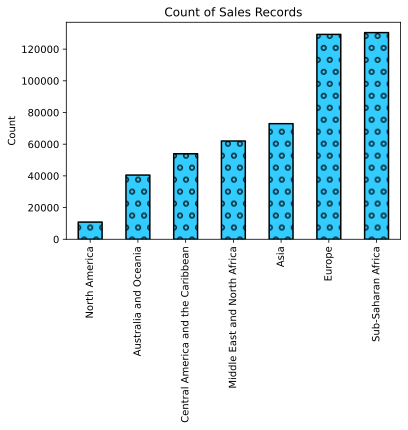

In [19]:
# This Line magic command helps us get clear plots
%config InlineBackend.figure_format = 'svg'

# Run value counts
sales.Region.value_counts(ascending=True).plot(kind = 'bar',
                                               facecolor = '#33ccff',
                                               title = 'Count of Sales Records',
                                               ylabel = 'Count',
                                               linewidth = 1.5,
                                               hatch = 'o',
                                               edgecolor = 'black');

**Exercise: Demonstrate how binning and then counting values can be used when the data is continuous. Use the unit price series**

* Works the same way the [cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) function in pandas does

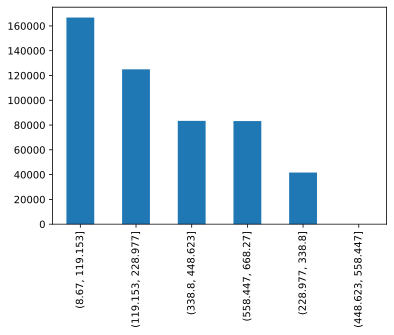

In [20]:
sales['Unit Price'].value_counts(bins = 6).plot(kind='bar');

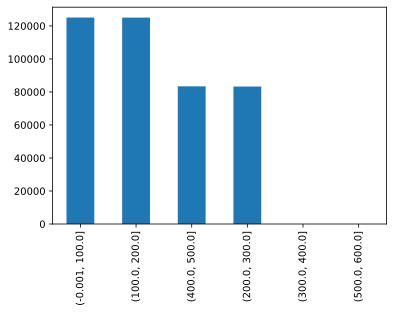

In [21]:
# Customise our bins
our_bins = [0, 100, 200, 300, 400, 500, 600]

sales['Unit Price'].value_counts(bins = our_bins).plot(kind = 'bar');

In the next notebook we move on to one of the most powerful and important methods in pandas; `df.groupby()`.